[Reference](https://pub.towardsai.net/understand-time-series-components-with-python-4bc3e2ba1189)

In [1]:
#to make a month column with added day
data['Month'] = data['Month'].apply(lambda x: dt(int(x[:4]),
                                                   int(x[5:]), 15))data = data.set_index('Month')
data.head()

In [2]:
ts = data['#Passengers']
plt.plot(ts)

In [3]:
df.month = pd.to_datetime(df.month)
df.set_index('month', inplace=True)

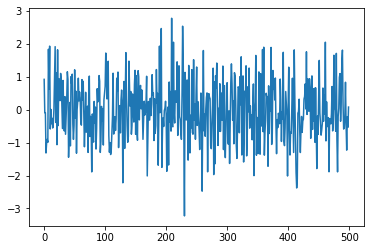

In [5]:
import numpy
import matplotlib.pyplot as plt
mean_value = 0
std_dev = 1 
no_of_samples = 500
time_data = numpy.random.normal(mean_value, std_dev, size=no_of_samples)

plt.plot(time_data)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


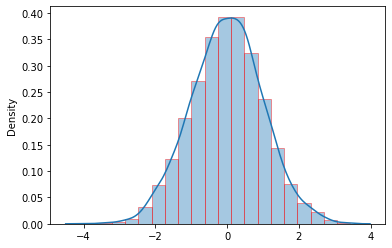

In [6]:
import numpy as np
import seaborn as sns

#mean value and standard deviation value
mean, std = 0, 1

#Normal distribution with 5000 samples
samples = np.random.normal(mean, std, size=5000)

#plotting normal distribution with seaborn library
sns.distplot(samples, bins=20, hist_kws={'edgecolor':'red'})

In [7]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=52,center=False).mean() 
    rolstd = timeseries.rolling(window=52,center=False).std()    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','
            p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
test_stationarity(data['#Passengers']